<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:8.01790
[2]	validation_0-rmse:7.72784
[3]	validation_0-rmse:7.44821
[4]	validation_0-rmse:7.19260
[5]	validation_0-rmse:6.94751
[6]	validation_0-rmse:6.72034
[7]	validation_0-rmse:6.51136
[8]	validation_0-rmse:6.30997
[9]	validation_0-rmse:6.11222
[10]	validation_0-rmse:5.93733
[11]	validation_0-rmse:5.74163
[12]	validation_0-rmse:5.57574
[13]	validation_0-rmse:5.39672
[14]	validation_0-rmse:5.23009
[15]	validation_0-rmse:5.07211
[16]	validation_0-rmse:4.93695
[17]	validation_0-rmse:4.79831
[18]	validation_0-rmse:4.67176
[19]	validation_0-rmse:4.55557
[20]	validation_0-rmse:4.43888
[21]	validation_0-rmse:4.33526
[22]	validation_0-rmse:4.23149
[23]	validation_0-rmse:4.13562
[24]	validation_0-rmse:4.05195
[25]	validation_0-rmse:3.97146
[26]	validation_0-rmse:3.88842
[27]	validation_0-rmse:3.81168
[28]	validation_0-rmse:3.74430
[29]	validation_0-rmse:3.67725
[30]	validation_0-rmse:3.62026
[31]	validation_0-rmse:3.56478
[32]	validation_0-rmse:3.51044
[33]	validation_0

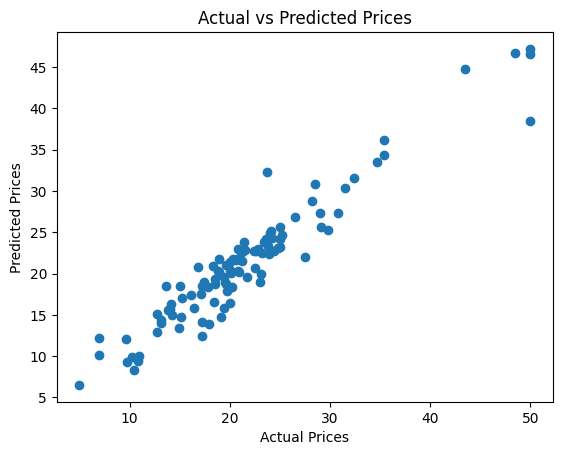

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
data = pd.read_csv(url)

# Display basic information
print(data.info())
print(data.describe())

# Drop columns if necessary (none for this dataset)
# data = data.drop(['Column1', 'Column2'], axis=1)

# Handle missing values if necessary (none for this dataset)
# imputer = SimpleImputer(strategy='median')
# data_imputed = pd.DataFrame(imputer.fit_transform(data.select_dtypes(include=[np.number])), columns=data.select_dtypes(include=[np.number]).columns)

# Handling categorical data if any
# data = pd.get_dummies(data, drop_first=True)

# Split data into features and target variable
X = data.drop('medv', axis=1)  # 'medv' is the target variable in this dataset
y = data['medv']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature engineering: Creating new features (if applicable)
# X_train['TotalSF'] = X_train['ColumnA'] + X_train['ColumnB']
# X_test['TotalSF'] = X_test['ColumnA'] + X_test['ColumnB']

# Initialize the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Train the model
model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], verbose=True)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Plotting actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()